## 영상정보처리 4주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 5점 
- 문제2: 5점

이름: 김경민            
학번: 32200327




In [3]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%cd /gdrive/My\ Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week4/
!pwd

/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week4
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week4


Souce image 는 다음의 image_path 를 변경하지 말고 이용할 것. logo.png 는 opencv_logo.png 와 동일 이미지이므로 해당 이미지가 없는 경우, 복사하여 이름을 변경하여 사용할 것. 경로가 다른 경우 감점 -3

In [5]:
image_path = '../Dongkeun-OpenCV-ImgData/logo.png' 

## 문제 1: 부분 이미지를 이용한 이미지 생성

1. 위의 이미지 경로를 이용하여 이미지를 컬러 이미지 org_image 로 읽기
2. 읽은 이미지와 동일 크기의 컬러 이미지를 new_image1 로 만들기 
3. new_image1 를 x 축 방향으로 4등분하고 왼쪽부터 subimage 1, 2, 3, 4 라고 할때 다음과 같이 new_image1을 구성하기 
  - x 축값이 4등분하여 4개의 영역이 동일 크기가 되지 않는 경우, 맨 오른쪽 영역에는 남는 크기 배분
  - subimage 1: 동일 영역에 해당하는 org_image 부분 복사하기 
  - subimage 2: 동일 영역에 해당하는 org_image 부분에서 Red 성분만 복사하고, green/blue 부분은 0으로 하여 subimage 2에 채워 넣을 것
  - subimage 3: 동일 영역에 해당하는 org_image 부분에서 Blue 성분만 복사하고, green/red 부분은 0으로 하여 subimage 3에 채워 넣을 것
  - subimage 4: 동일 영역에 해당하는 org_image 부분에서 Green 성분만 복사하고, blue/red 부분은 0으로 하여 subimage 4에 채워 넣을 것

4. new_image1 을 디스플레이하기 

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [35]:
org_image = cv2.imread(image_path,cv2.IMREAD_COLOR)
print("size =",org_image.size)

size = 102684


In [36]:
#org_image 동일 크기 공백 컬러 이미지 생성
new_image1 = np.zeros((org_image.shape),dtype="uint8")
new_image1[:] = 255
print("size =",new_image1.size)

size = 102684


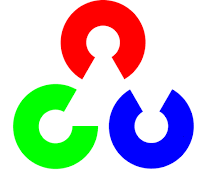

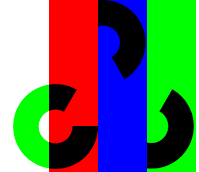

In [39]:
h,w,c = new_image1.shape
#print(h,w)
base = int(w/4)
cv2_imshow(org_image)

for i in range(4):
  for j in range(3):
    if(i==0):
      new_image1[:,base*i:base*(i+1),j] = org_image[:,base*i:base*(i+1),j] 
    elif(i==1):
      if(j==2):
        new_image1[:,base*i:base*(i+1),j] = org_image[:,base*i:base*(i+1),j] 
      else:
        new_image1[:,base*i:base*(i+1),j] = 0
    elif(i==2):
      if(j==0):
        new_image1[:,base*i:base*(i+1),j] = org_image[:,base*i:base*(i+1),j] 
      else:
        new_image1[:,base*i:base*(i+1),j] = 0
    elif(i==3):
      if(j==1):
        new_image1[:,base*i:base*(i+1),j] = org_image[:,base*i:base*(i+1),j] 
      else:
        new_image1[:,base*i:base*(i+1),j] = 0

cv2_imshow(new_image1)

## 문제 2: 식을 이용한 grayscale 이미지 만들기 

1. org_image와 같은 크기의 공백 grayscale 이미지 new_image2 만들기
2. org_image 의 각 화소를 접근하여 강의에서 설명한 공식을 사용하여 grayscale 값으로 변환하여 새로운 그레이스케일 이미지 new_image2 에 저장하기
2. new_image2 디스플레이하기 

[참조] https://stackoverflow.com/questions/17615963/standard-rgb-to-grayscale-conversion



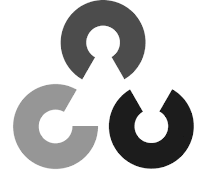

In [40]:
#공백 grayscale image
new_image2 = np.zeros((org_image.shape[0],org_image.shape[1]),dtype="uint8") #org_image와 크기는 동일한 공백 이미지 생성(channel= 1 grayscale image)
#new_image2[:] = 255 #공백색을 White로
#print(new_image2.shape)
#cv2_imshow(new_image2) 

row, col ,ch = org_image.shape #row:h col:w
for i in range(row):
  for j in range(col):
    new_image2[i,j] = ((org_image[i,j,0] * 0.11) + (org_image[i,j,1] * 0.59) + (org_image[i,j,2] * 0.30))

cv2_imshow(new_image2)
